# Genetic Algorithm for Optimization Problems:  

---




A genetic algorithm (GA) is an optimization technique that uses a natural selection process to solve optimization problems





# Pseudocode:

1. Define the Problem:
    - Define a fitness function that needs to be optimized (e.g., f(x) = x^2)

2. Initialize Parameters:
    - Set population size (e.g., 20)
    - Set mutation rate (e.g., 0.1)
    - Set crossover rate (e.g., 0.7)
    - Set the number of generations (e.g., 100)
    - Define the range of values for the problem (e.g., min_value = -10, max_value = 10)

3. Create Initial Population:
    - Generate an initial population with random solutions between min_value and max_value

4. Evaluate Fitness:
    - For each individual in the population, evaluate its fitness using the fitness function

5. Selection:
    - Select individuals based on their fitness to reproduce (use tournament selection):
        - Randomly select two individuals from the population
        - Choose the one with the better fitness

6. Crossover:
    - For each pair of selected individuals (parents):
        - If random number < crossover rate:
            - Perform crossover by averaging the two parents at a randomly chosen point
        - Else, retain the parents without crossover

7. Mutation:
    - For each offspring generated:
        - If random number < mutation rate:
            - Apply a random mutation by adding a small value to the offspring
        - Ensure the offspring remains within the allowed range (min_value to max_value)

8. Iteration:
    - Repeat steps 4 to 7 for a fixed number of generations or until convergence:
        - Evaluate the fitness of the population
        - Track the best solution (individual with the highest fitness)
        - Apply selection, crossover, and mutation to generate the next generation

9. Output the Best Solution:
    - Return the best solution found and its corresponding fitness value


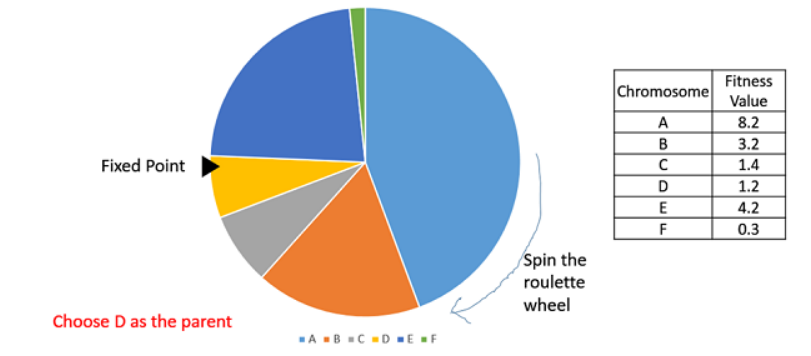

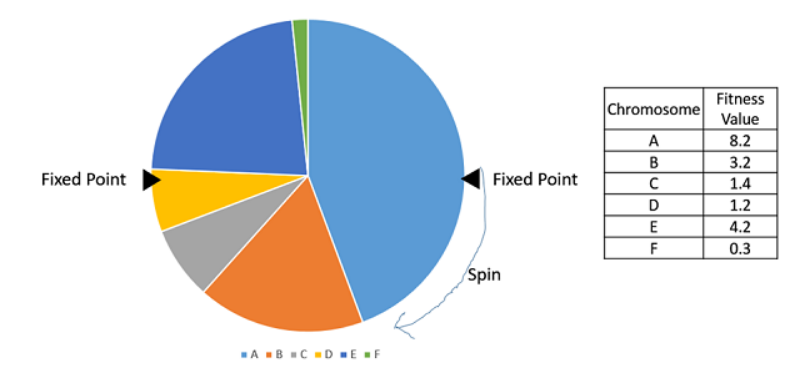



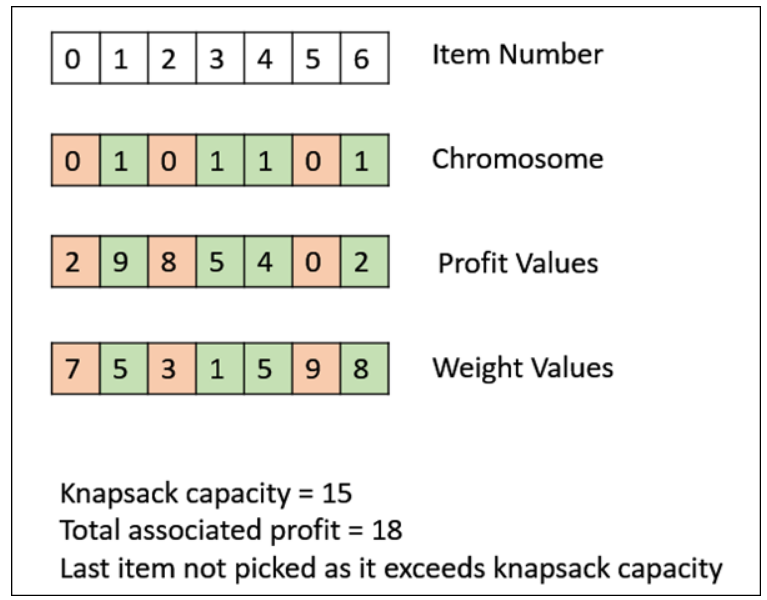

In [4]:
import random

# 1. Define the Problem: The function to optimize (maximize f(x) = x^2)
def fitness_function(x):
    return x ** 2

# 2. Initialize Parameters
population_size = 20  # Number of individuals in the population
mutation_rate = 0.1   # Probability of mutation
crossover_rate = 0.7  # Probability of crossover
num_generations = 100  # Number of generations
min_value = -10  # Minimum value of x
max_value = 10   # Maximum value of x

# 3. Create Initial Population: Random values between min_value and max_value
def create_population():
    return [random.uniform(min_value, max_value) for _ in range(population_size)]

# 4. Evaluate Fitness: Evaluate the fitness of each individual in the population
def evaluate_fitness(population):
    return [fitness_function(x) for x in population]

# 5. Selection: Tournament Selection (choosing two individuals and picking the better one)
def selection(population, fitness):
    selected = []
    for _ in range(population_size):
        # Randomly pick two individuals and select the one with better fitness
        tournament = random.sample(list(zip(population, fitness)), 2)
        winner = max(tournament, key=lambda individual: individual[1])
        selected.append(winner[0])
    return selected

# 6. Crossover: One-point crossover between two parents (real-valued crossover)
def crossover(parent1, parent2):
    if random.random() < crossover_rate:
        # Perform crossover at the midpoint (average of two parents)
        crossover_point = random.uniform(min_value, max_value)
        child1 = (parent1 + crossover_point) / 2
        child2 = (parent2 + crossover_point) / 2
        return [child1, child2]
    else:
        return [parent1, parent2]

# 7. Mutation: Random mutation on a child
def mutate(child):
    if random.random() < mutation_rate:
        mutation = random.uniform(-1, 1)
        child += mutation
        child = max(min(child, max_value), min_value)  # Ensure within bounds
    return child

# 8. Iteration: Run for several generations
def genetic_algorithm():
    population = create_population()
    best_solution = None
    best_fitness = -float('inf')

    for generation in range(num_generations):
        fitness = evaluate_fitness(population)
        # Track the best solution
        max_fitness = max(fitness)
        best_solution = population[fitness.index(max_fitness)]
        best_fitness = max_fitness

        # Selection
        selected_population = selection(population, fitness)

        # Crossover and Mutation
        next_population = []
        for i in range(0, len(selected_population), 2):
            parent1, parent2 = selected_population[i], selected_population[i+1]
            children = crossover(parent1, parent2)
            next_population.extend([mutate(child) for child in children])

        population = next_population

    return best_solution, best_fitness

# 9. Output the Best Solution
best_solution, best_fitness = genetic_algorithm()
print("C NEHA- 1BM22CS074")
print(f"Best solution: x = {best_solution}")
print(f"Best fitness: f(x) = {best_fitness}")


C NEHA- 1BM22CS074
Best solution: x = -8.089434487616085
Best fitness: f(x) = 65.43895032943252
